In [2]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn import linear_model
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter

from sklearn.metrics import classification_report

import xgboost as xgb

import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [45]:
selected_column = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'other_fuel1',
    'other_fuel2',
    'other_fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'generation_gwh_2018',
    'generation_gwh_2019',
    'estimated_generation_gwh'
]

In [46]:
len(selected_column)

18

In [47]:
df2 = df[selected_column].copy()

In [48]:
df2.sample(5)

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
159,IND,India,DADRI GT,829.78,Gas,Oil,NaN,NaN,1992.0,2019.0,NaN,2462.00,2924.0,2178.00,1575.000,1605.00,NaN,NaN
653,IND,India,ROPAR,840.00,Coal,Oil,NaN,NaN,1990.0,2019.0,NaN,5260.71,3600.7,2508.11,2068.276,1572.83,NaN,NaN
299,IND,India,Jamuria Solar Power Plant,2.00,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,IND,India,NEPANAGAR MILL,12.27,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,IND,India,SERVALAR,20.00,Hydro,NaN,NaN,NaN,1986.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2.describe()

,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,907.000000,0.0,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,0.0
mean,326.223755,NaN,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN
std,590.085456,NaN,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,NaN
min,0.000000,NaN,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,NaN,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,NaN
50%,59.200000,NaN,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,NaN
75%,385.250000,NaN,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,NaN
max,4760.000000,NaN,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [49]:
df2[df2.generation_gwh_2013 == -947.6000000]

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh


In [50]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [51]:
df2.country_long.nunique()

1

In [52]:
countries_plant = df2.country_long.value_counts().head(20)
countries_plant

country_long
India    907
Name: count, dtype: int64

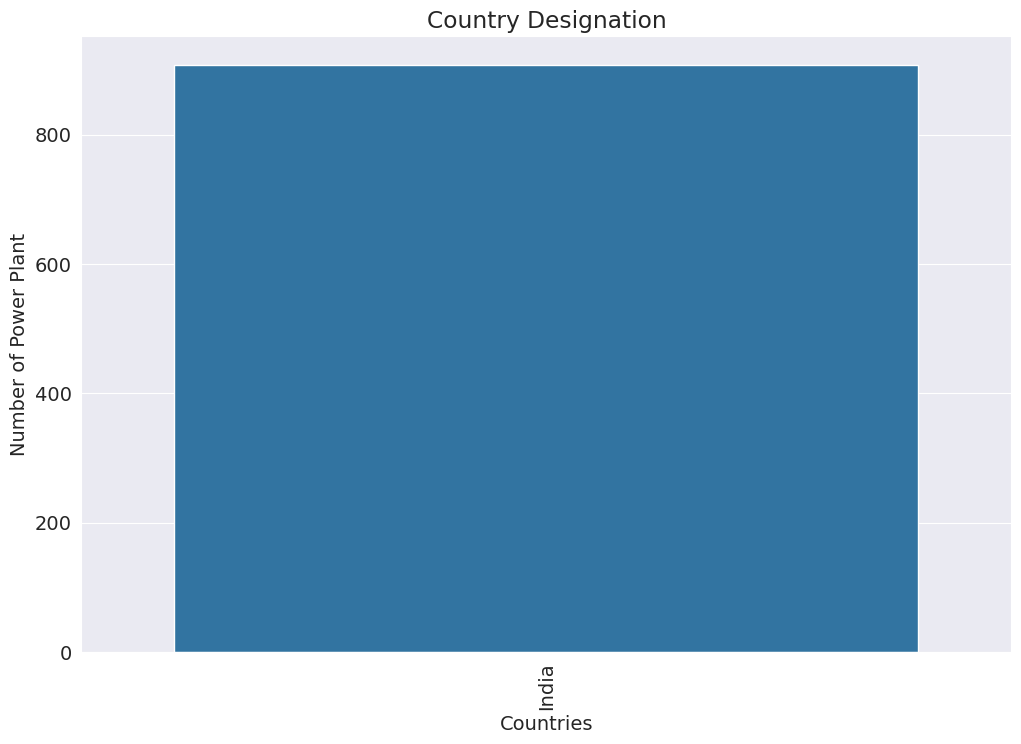

In [53]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

In [54]:
main_primary_fuel = df2.primary_fuel.value_counts() * 100 / df2.primary_fuel.count()
main_primary_fuel

primary_fuel
Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: count, dtype: float64

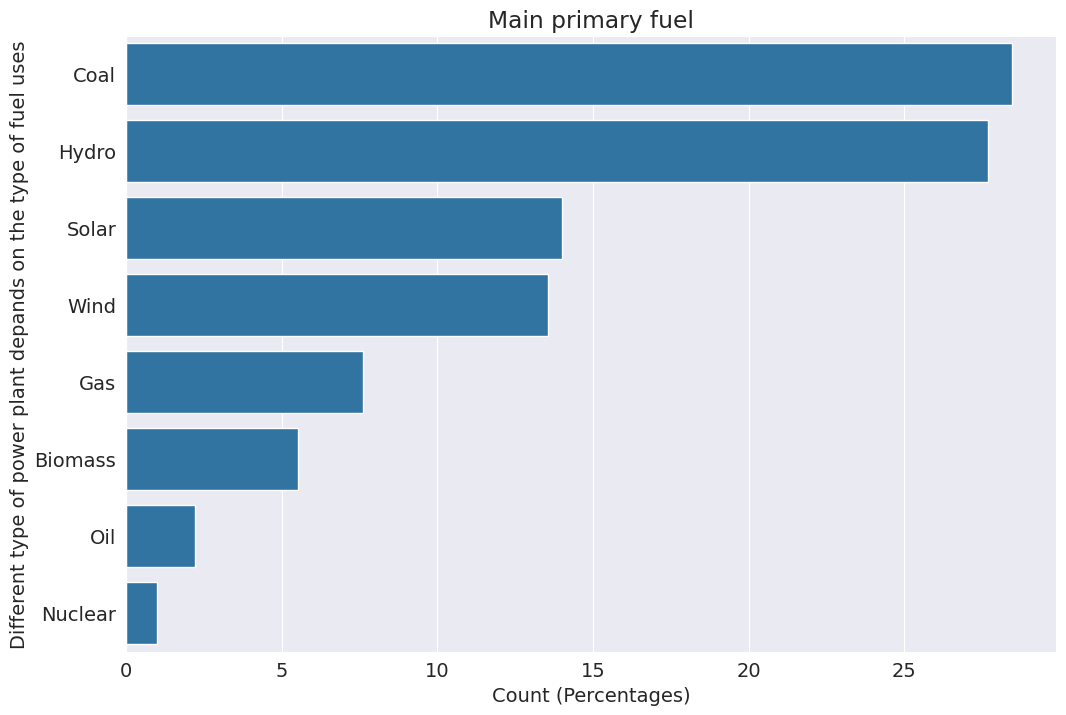

In [55]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

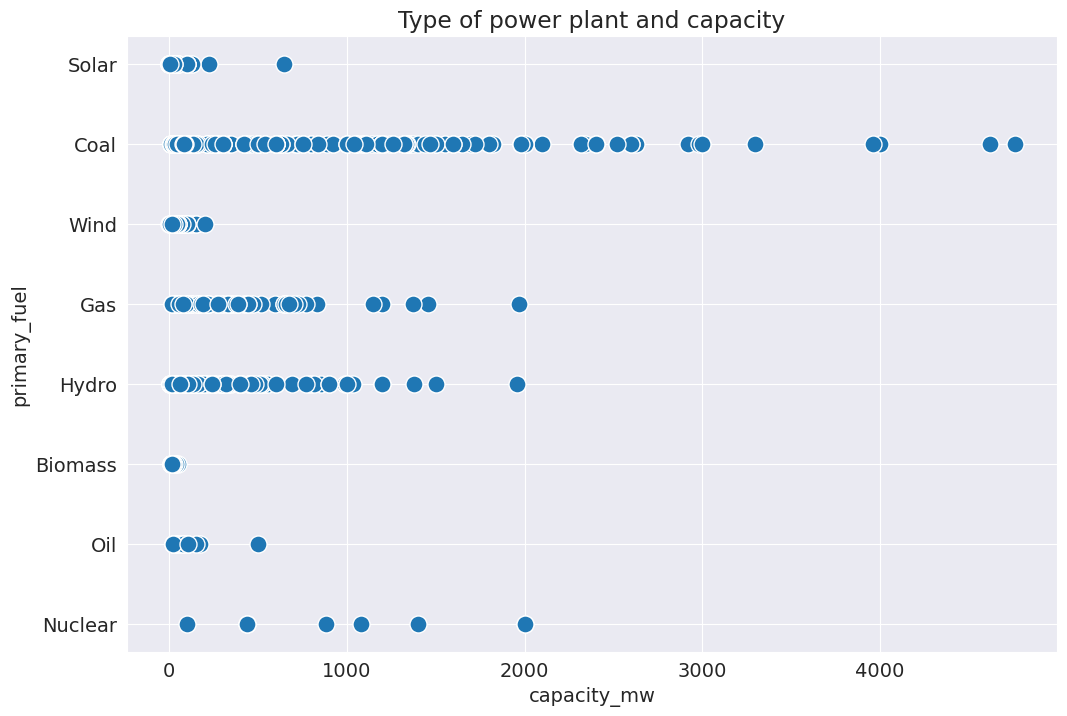

In [56]:
sns.scatterplot(x = df2.capacity_mw, y = df2.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [57]:
countries_capacity = df2.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity

,capacity_mw
country_long,
India,295884.946


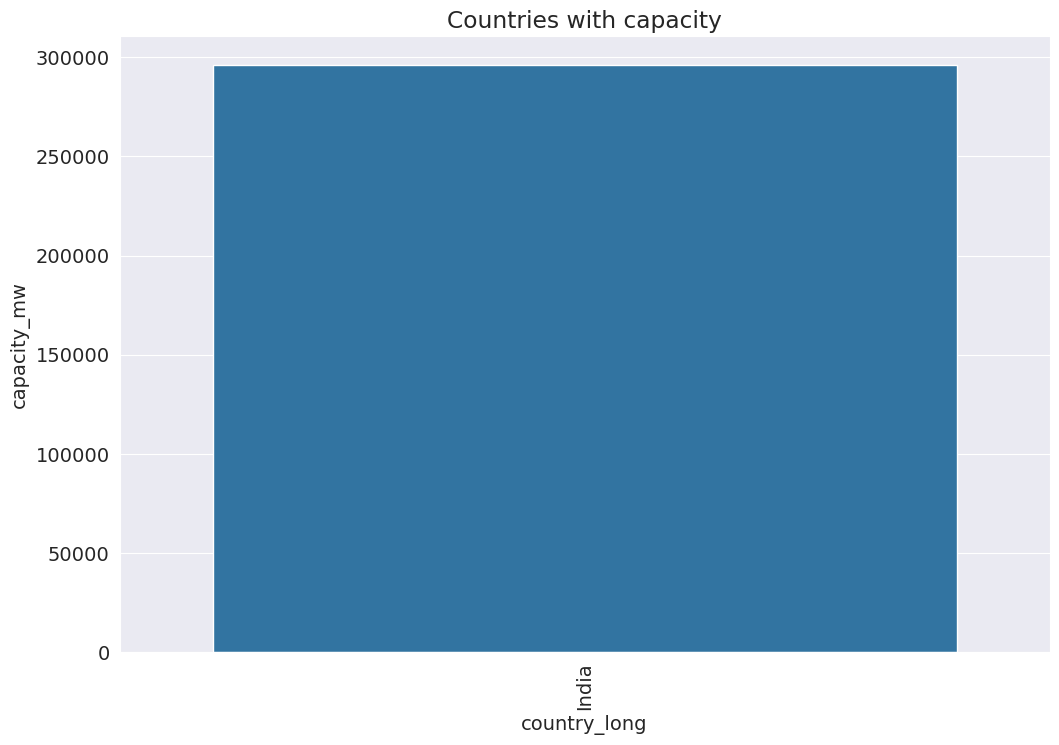

In [58]:
sns.barplot(x = countries_capacity.index, y = countries_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Countries with capacity');

In [59]:
df2.generation_gwh_2013.isna().sum()

907

In [60]:
est_gen_2013 = df2.groupby('country_long')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False).head(10)
est_gen_2013_UIA = est_gen_2013[est_gen_2013.index.isin(['United States of America', 'India', 'Australia'])]

In [61]:
est_gen_2014 = df2.groupby('country_long')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False).head(10)
est_gen_2014_UIA = est_gen_2014[est_gen_2014.index.isin(['United States of America', 'India', 'Australia'])]

In [62]:
est_gen_2015 = df2.groupby('country_long')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False).head(20)
est_gen_2015_UIA = est_gen_2015[est_gen_2015.index.isin(['United States of America', 'India', 'Australia'])]

In [63]:
est_gen_2016 = df2.groupby('country_long')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False).head(20)
est_gen_2016_UIA = est_gen_2016[est_gen_2016.index.isin(['United States of America', 'India', 'Australia'])]

In [64]:
est_gen_2017 = df2.groupby('country_long')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False).head(10)
est_gen_2017_UIA = est_gen_2017[est_gen_2017.index.isin(['United States of America', 'India', 'Australia'])]

In [65]:
est_gen_2018 = df2.groupby('country_long')[['generation_gwh_2018']].sum().sort_values('generation_gwh_2018', ascending = False).head(10)
est_gen_2018_UIA = est_gen_2018[est_gen_2018.index.isin(['United States of America', 'India', 'Australia'])]

In [66]:
est_gen_2019 = df2.groupby('country_long')[['generation_gwh_2019']].sum().sort_values('generation_gwh_2019', ascending = False).head(10)
est_gen_2019_UIA = est_gen_2019[est_gen_2019.index.isin(['United States of America', 'India', 'Australia'])]

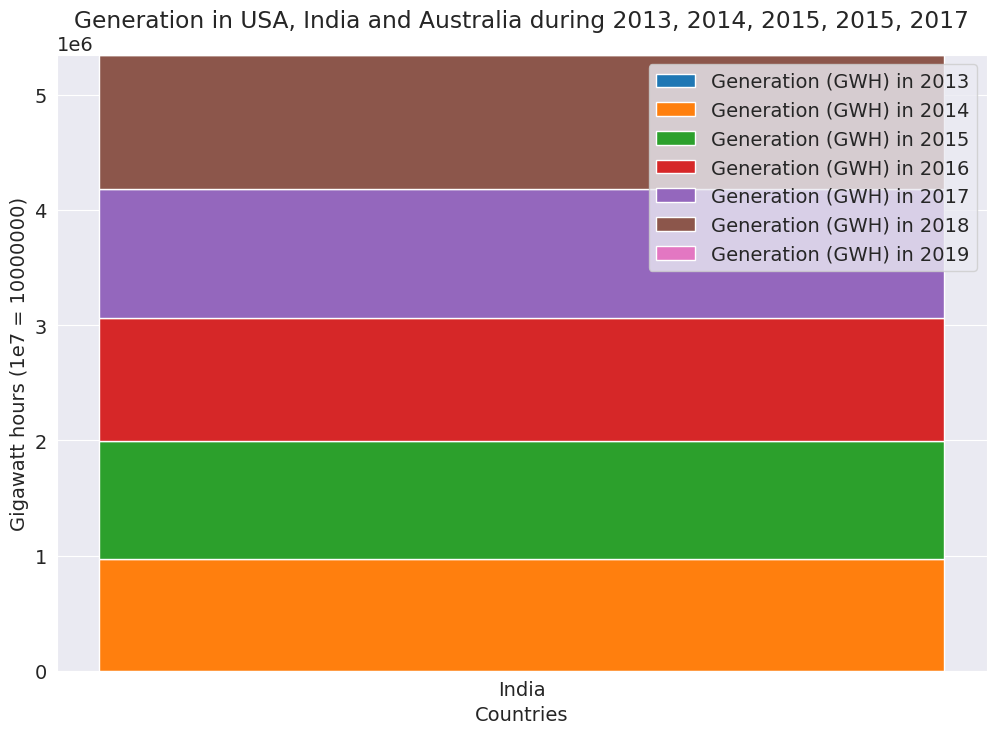

In [67]:
plt.bar(est_gen_2013_UIA.index, est_gen_2013_UIA.generation_gwh_2013)
plt.bar(est_gen_2014_UIA.index, est_gen_2014_UIA.generation_gwh_2014, bottom = est_gen_2013_UIA.generation_gwh_2013);
plt.bar(est_gen_2015_UIA.index, est_gen_2015_UIA.generation_gwh_2015, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014)
plt.bar(est_gen_2016_UIA.index, est_gen_2016_UIA.generation_gwh_2016, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015)
plt.bar(est_gen_2017_UIA.index, est_gen_2017_UIA.generation_gwh_2017, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015 + est_gen_2016_UIA.generation_gwh_2016)
plt.bar(est_gen_2018_UIA.index, est_gen_2018_UIA.generation_gwh_2018, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015 + est_gen_2016_UIA.generation_gwh_2016 + est_gen_2017_UIA.generation_gwh_2017)
plt.bar(est_gen_2019_UIA.index, est_gen_2019_UIA.generation_gwh_2019, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015 + est_gen_2016_UIA.generation_gwh_2016 + est_gen_2017_UIA.generation_gwh_2017 + est_gen_2018_UIA.generation_gwh_2018)

plt.legend(
    [
        'Generation (GWH) in 2013', 
        'Generation (GWH) in 2014', 
        'Generation (GWH) in 2015', 
        'Generation (GWH) in 2016', 
        'Generation (GWH) in 2017',
        'Generation (GWH) in 2018',
        'Generation (GWH) in 2019'
        ]
    )
plt.title('Generation in USA, India and Australia during 2013, 2014, 2015, 2015, 2017')
plt.xlabel('Countries')
plt.ylabel('Gigawatt hours (1e7 = 10000000)');

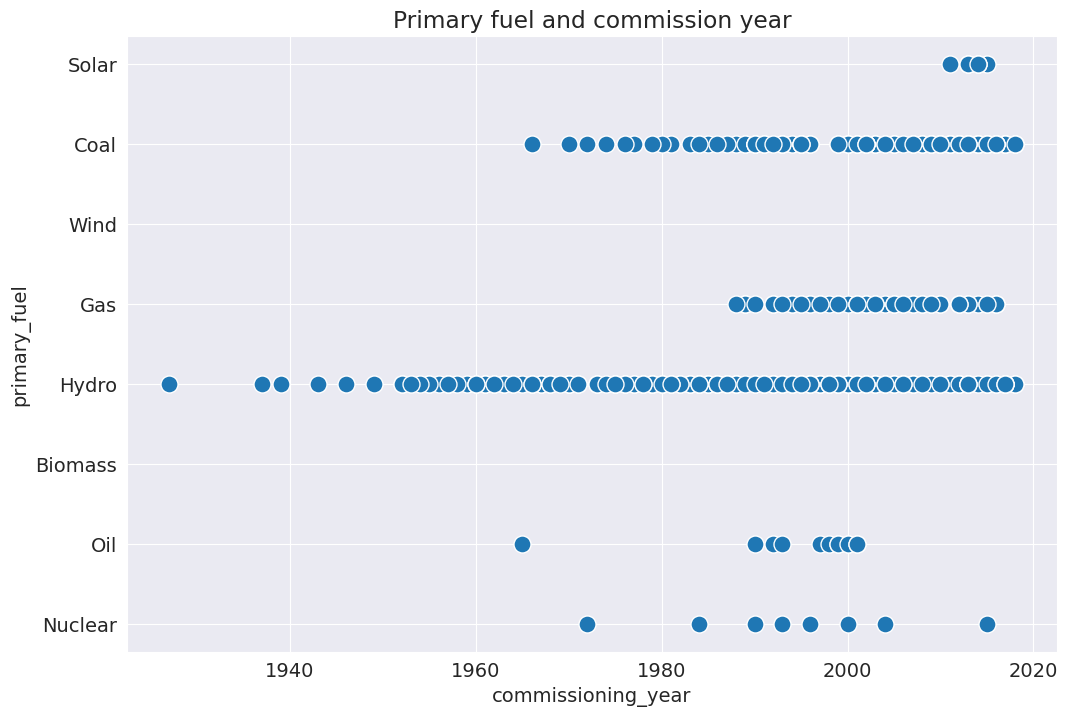

In [68]:
sns.scatterplot(x = df2.commissioning_year, y = df2.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

In [69]:
df2.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [70]:
renewable_energy = df[df.primary_fuel.isin(['Hydro', 'Wind', 'Solar', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Storage'])]
number_of_renewable_energy = renewable_energy.country_long.value_counts().head(30)
number_of_renewable_energy

country_long
India    551
Name: count, dtype: int64

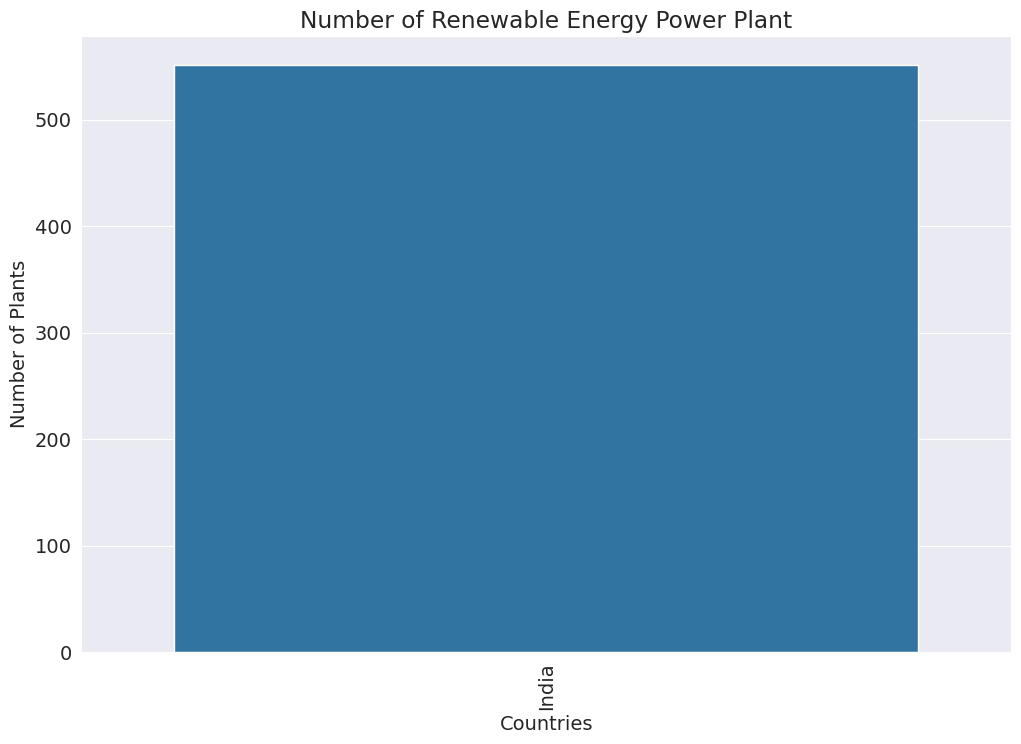

In [32]:
sns.barplot(x = number_of_renewable_energy.index, y = number_of_renewable_energy)
plt.xticks(rotation = 90)
plt.title('Number of Renewable Energy Power Plant')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [71]:
fosil_fuel = df2[df2.primary_fuel.isin(['Gas', 'Oil', 'Coal', 'Nuclear', 'Petcoke', 'Cogeneration'])]
number_of_fosil_fuel_plant = fosil_fuel.country_long.value_counts().head(30)
number_of_fosil_fuel_plant

country_long
India    356
Name: count, dtype: int64

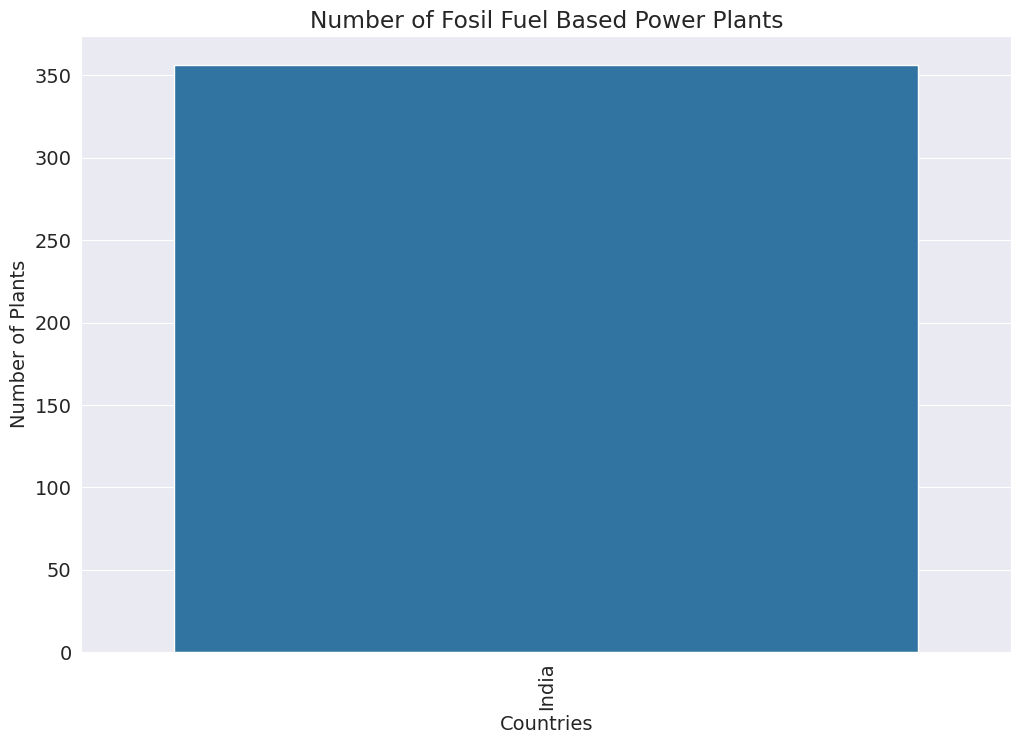

In [35]:
sns.barplot(x = number_of_fosil_fuel_plant.index, y = number_of_fosil_fuel_plant)
plt.xticks(rotation = 90)
plt.title('Number of Fosil Fuel Based Power Plants')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [73]:
negative_power_plant = df2[df2.generation_gwh_2013 < 0]
neg_gen_2013 = negative_power_plant.groupby('country_long')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False)

negative_power_plant = df2[df2.generation_gwh_2014 < 0]
neg_gen_2014 = negative_power_plant.groupby('country_long')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False)

negative_power_plant = df2[df2.generation_gwh_2015 < 0]
neg_gen_2015 = negative_power_plant.groupby('country_long')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False)

negative_power_plant = df2[df2.generation_gwh_2016 < 0]
neg_gen_2016 = negative_power_plant.groupby('country_long')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False)

negative_power_plant = df2[df2.generation_gwh_2017 < 0]
neg_gen_2017 = negative_power_plant.groupby('country_long')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False)

negative_power_plant = df2[df2.generation_gwh_2018 < 0]
neg_gen_2018 = negative_power_plant.groupby('country_long')[['generation_gwh_2018']].sum().sort_values('generation_gwh_2018', ascending = False)

negative_power_plant = df2[df2.generation_gwh_2019 < 0]
neg_gen_2019 = negative_power_plant.groupby('country_long')[['generation_gwh_2019']].sum().sort_values('generation_gwh_2019', ascending = False)

In [78]:
negative_generation_2013_to_2017 = pd.DataFrame([neg_gen_2013.generation_gwh_2013, neg_gen_2014.generation_gwh_2014, neg_gen_2015.generation_gwh_2015, neg_gen_2016.generation_gwh_2016, neg_gen_2017.generation_gwh_2017, neg_gen_2018.generation_gwh_2018, neg_gen_2019.generation_gwh_2019])
negative_generation_2013_to_2017

country_long
generation_gwh_2013
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_gwh_2018
generation_gwh_2019


In [80]:
negative_generation_2013_to_2017.sum()

Series([], dtype: float64)

In [82]:
nuclear_plant = df2[df2.primary_fuel.isin(['Nuclear'])]
number_of_nuclear_plant = nuclear_plant.country_long.value_counts().head(35)
number_of_nuclear_plant

country_long
India    9
Name: count, dtype: int64

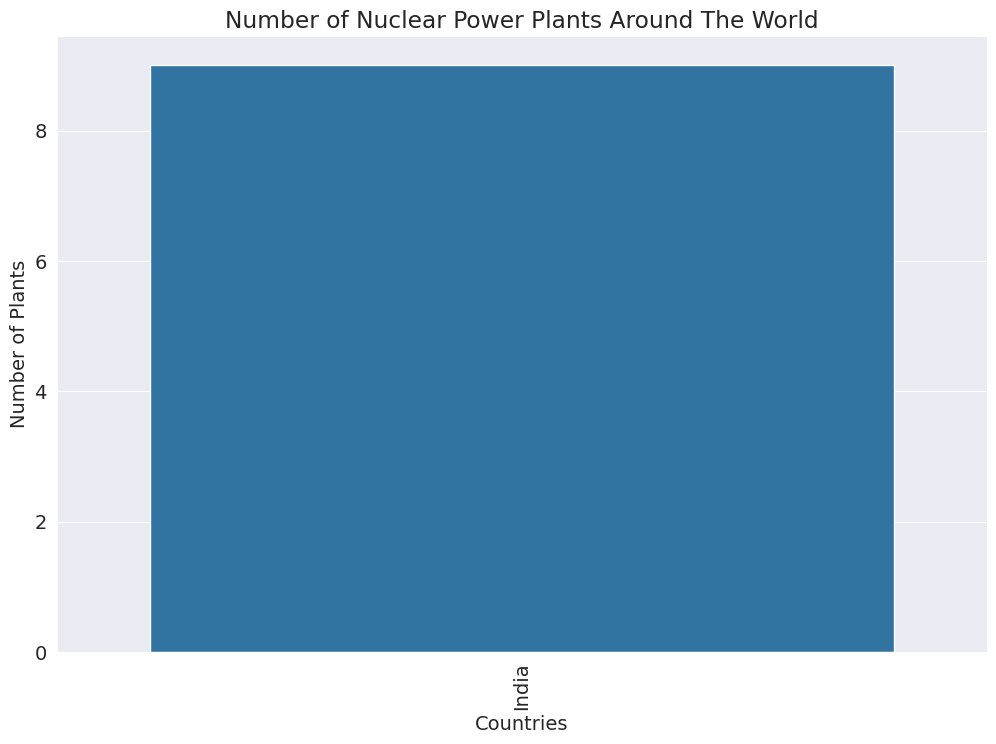

In [83]:
sns.barplot(x = number_of_nuclear_plant.index, y = number_of_nuclear_plant)
plt.xticks(rotation = 90)
plt.title('Number of Nuclear Power Plants Around The World')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [84]:
print('There are {} counties have total {} nuclear power plants.'.format(len(number_of_nuclear_plant), number_of_nuclear_plant.sum()))

There are 1 counties have total 9 nuclear power plants.


In [88]:
in_power_plant = df2[df2.country_long == 'India']

In [89]:
total_power_plant = in_power_plant.country_long.value_counts()
total_power_plant

country_long
India    907
Name: count, dtype: int64

In [90]:
total_capacity = in_power_plant.capacity_mw.sum()
print('India has total capacity of {} megawatt.'.format(total_capacity))

India has total capacity of 295884.946 megawatt.


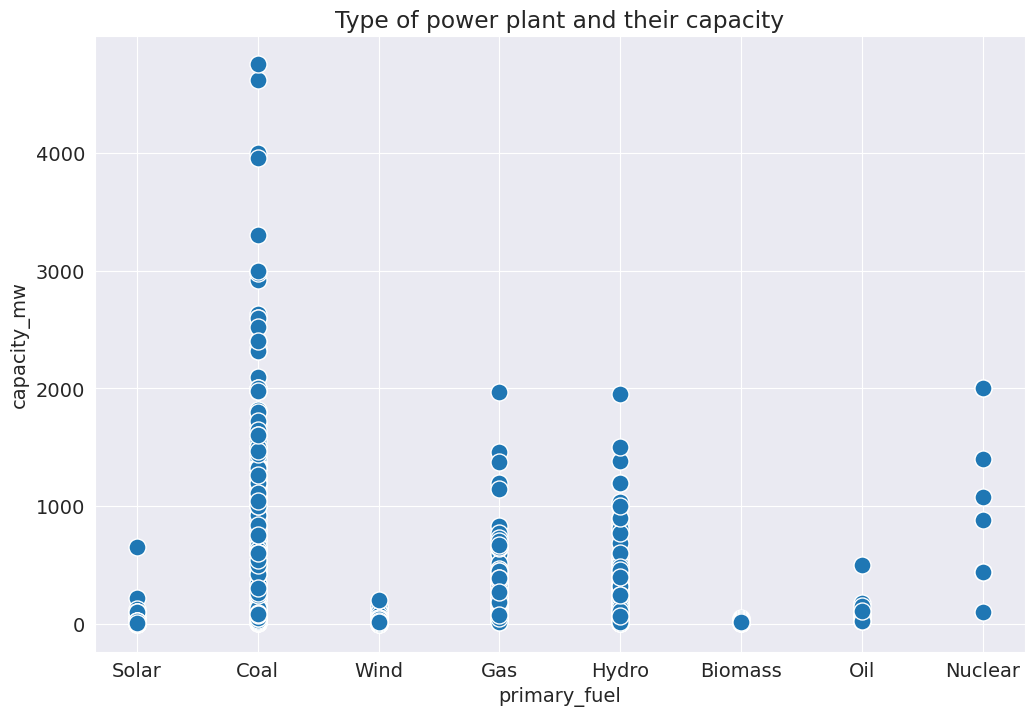

In [91]:
sns.scatterplot(x = in_power_plant.primary_fuel, y = in_power_plant.capacity_mw, s = 150)
plt.title('Type of power plant and their capacity');